In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

impath - путь к исходному изображению.
Входные параметры (в пикселях):

- minDist - минимальное расстояние между центрами окружностей
- minR - минимальный радиус окружности
- maxR - максимальный радиус окружности

In [2]:
impath = "pills.jpeg"
minDist = 100
minR = 30
maxR = 70

In [3]:
def findCircles(dst, src, dp):
    circles = cv2.HoughCircles(src, cv2.HOUGH_GRADIENT, dp, minDist, minRadius=minR, maxRadius=maxR)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for x, y, r in circles:
            cv2.circle(dst, (x, y), r, (0, 0, 255), 4)
            cv2.rectangle(dst, (x - 5, y - 5), (x + 5, y + 5), (0, 255, 0), -1)
    

def draw(im):
    plt.figure(figsize=(14, 14))
    plt.axis('off')
    plt.imshow(im)
    plt.plot()

Исходное изображение и его обесцвеченная версия:

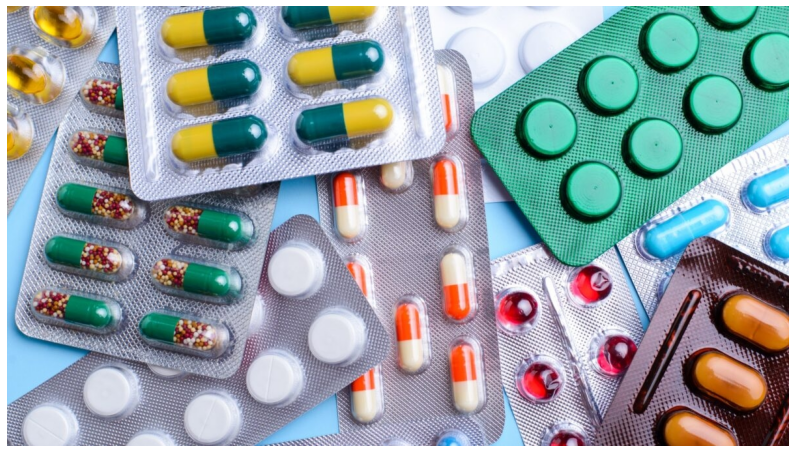

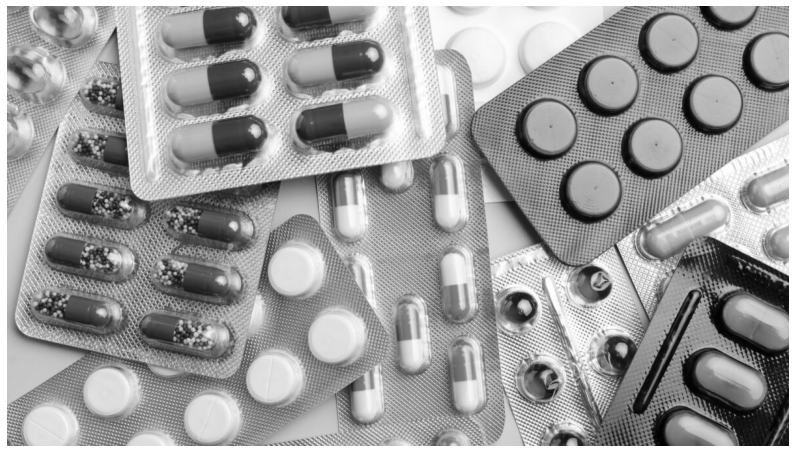

In [4]:
image = cv2.imread(impath)
result = image.copy()
gsImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
draw(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
draw(cv2.cvtColor(gsImage, cv2.COLOR_BGR2RGB))

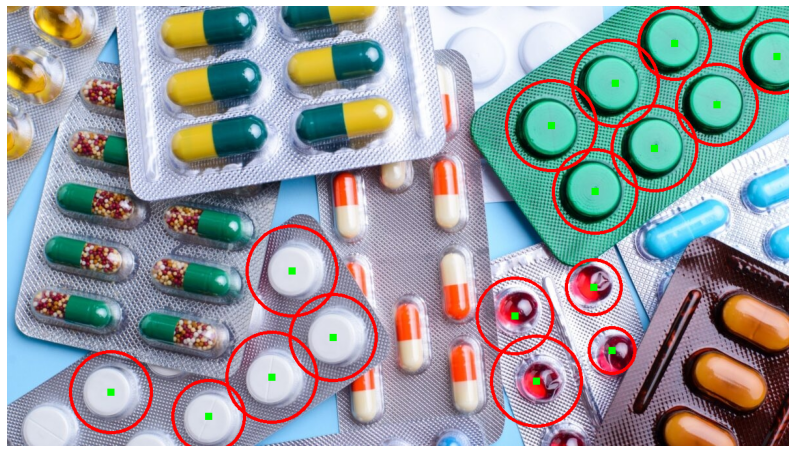

In [5]:
findCircles(result, gsImage, 1.3)
draw(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
status = cv2.imwrite('result.bmp', result)

Варьирование параметра dp (отношение размера изображения к размеру объекта-аккумулятора) при заданных minDist, minR, maxR может заметно сказаться на количестве распознанных окружностей - для данного изображения они обнаруживаются почти повсеместно, что связано с наличием на упаковках таблеток отражений, а также с округлой формой самих таблеток:

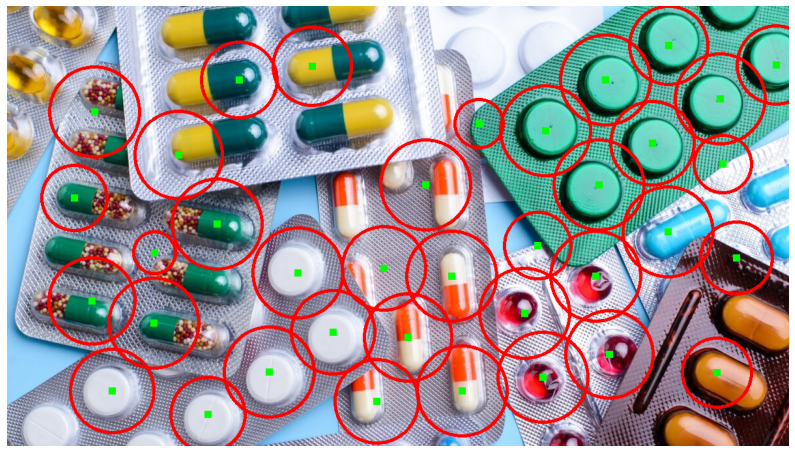

In [6]:
plenty = image.copy()
findCircles(plenty, gsImage, 1.6)
draw(cv2.cvtColor(plenty, cv2.COLOR_BGR2RGB))